<a href="https://colab.research.google.com/github/mateocapon/simulacion_tp1/blob/main/Ejercicio%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 5

In [112]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns


modulo = 2**32
multiplicador = 1013904223
incremento = 1664525
semilla = int((101503+103856+104258+102995)/4)

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

N = 100000

In [114]:
x = generarRandomNormalizada(N)

pA = 0.1
pB = 0.5
pC = 0.3
pD = 0.1

A = []
B = []
C = []
D = []

for i in x:
    if i <= pA:
      A.append(i)
    elif i <= pA+pB:
      B.append(i)
    elif i <= pA+pB+pC:
      C.append(i)
    else:
      D.append(i)

In [123]:
Y = [len(A),len(B),len(C),len(D)]

X = ["A","B","C","D"]

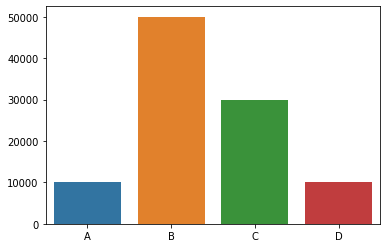

In [124]:
sns.barplot( x=X , y=Y )

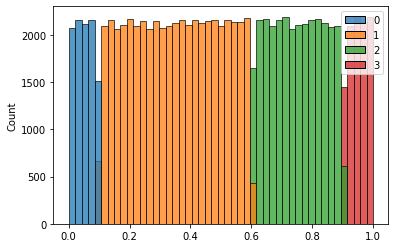

In [126]:
df = [(A),(B),(C),(D)]
sns.histplot(data=df)